# Loading the data

In [317]:
import pandas as pd

In [318]:
csv_files = !ls datastatic/datasets/online/*csv

In [319]:
data = {}

for file in csv_files:
    data[file] = pd.read_csv(file)


# Comparing  countries

In [293]:
countries = {}

for file in csv_files:
    d = data[file]
    
    # Get SDG if exist
    try:
        sdg = int(d.ix[2,1])
    except:
        sdg = d.ix[2,1]

    # Get SDG Name
    sdg_name = d.ix[1,1]
    
    # Get Name of the index,
    index_name = d.ix[1][1]
    # the target value...
    target = d.ix[13,1]
    # ...and its range
    target_range = d.ix[14,1]

    # Get the values for each contry
    for _, row in d[36:].iterrows():
        try:
            country_name = row[0].strip()
        except:
            pass
        
        if not country_name in countries:
            countries[country_name] = []
            
        # Finally get the value of the index for a specific country
        index_value = row[1]    
        countries[country_name] += [(country_name, sdg_name, sdg, target, target_range, index_name, index_value)]
        
for country, c_data in countries.items():
    countries[country] = pd.DataFrame(c_data, columns=['country', 'sdg_name', 'sdg', 'target', 'range', 'name', 'value'])

In [295]:
countries_df = pd.concat(countries.values())

In [302]:
def get_sdg_countries(countries=['Germany'], sdg=10):
    df = []
    
    for country in countries:
        df += [countries_df[(countries_df.country == country) & (countries_df.sdg == sdg)]]

    ranges = countries_df[(countries_df.country == countries[0]) & (countries_df.sdg == sdg)]['range']
    rf = []

    for r in ranges:
        def mf(r):
            def f(x):
                r0 = float(r.split(',')[0].strip())
                rmax = float(r.split(',')[-1].strip())
                rlen = r0 - rmax
                return 1 - (r0 - x)/rlen
            return f
        f = mf(r)
        rf += [f]
        
    data = {}
    
    for ci, c in enumerate(countries):
        data[c] = []
        for i, f in enumerate(rf):
            data[c] += [(df[ci].iloc[i]['name'], f(float(df[ci].iloc[i]['value'])))]

    sdg_name = countries_df[countries_df.sdg == sdg].iloc[0]['sdg_name']
    return (sdg_name, data)

In [303]:
sdg_name, countries_data = get_sdg_countries([;])

In [311]:
def plot_countries(countries_data, sdg_name=""):
    countries = pd.concat([pd.DataFrame(c).loc[:,1] for c in countries_data.values()], axis=1)
    countries.columns = countries_data.keys()
    labels =  [c[0] for c in list(countries_data.items())[0][1]]
    ax = countries.plot.barh()
    ax.set_yticklabels(labels)
    if sdg_name:
        ax.set_title(sdg_name)
    plt.axvline(1, color='k')
    plt.axvline(0, color='k')
    
def plot_sdg(countries=['Germany'], sdg=10):
    sdg_name, countries_data = get_sdg_countries(countries=countries, sdg=sdg)
    plot_countries(countries_data, sdg_name)

Problems at 6
Problems at 9
Problems at 15
Problems at 16


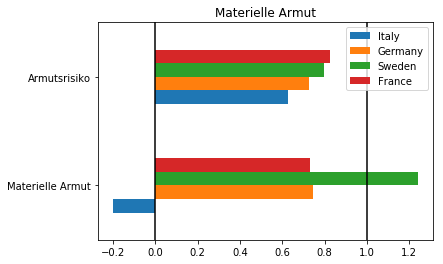

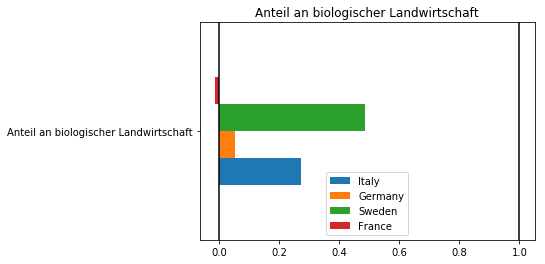

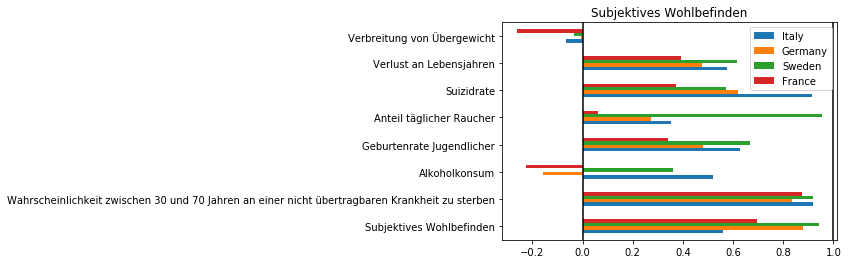

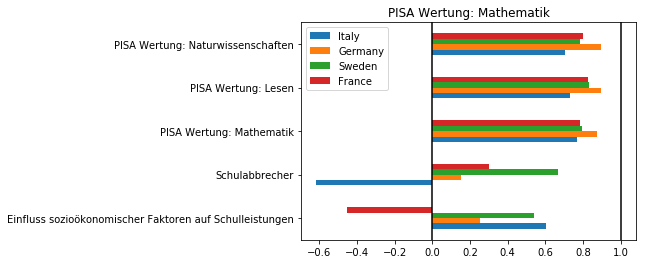

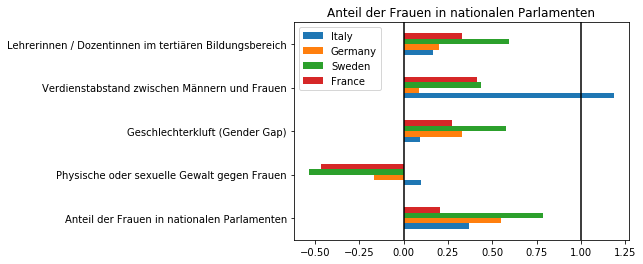

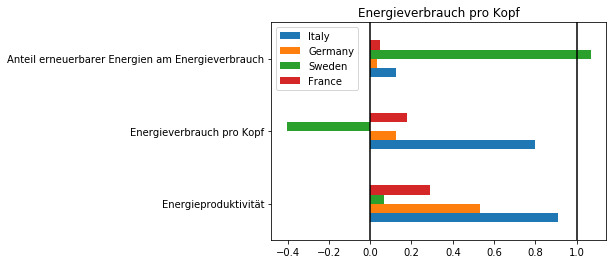

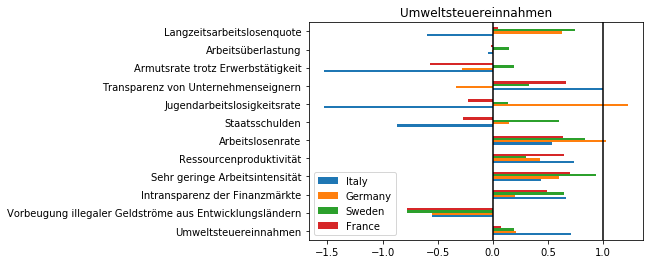

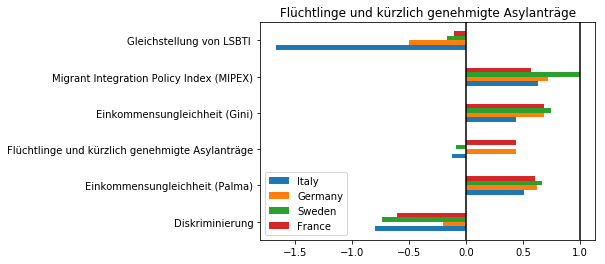

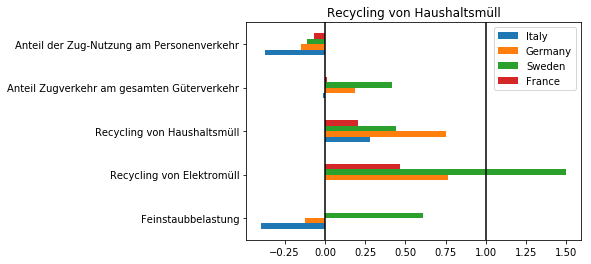

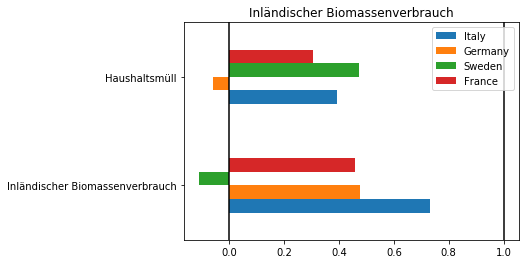

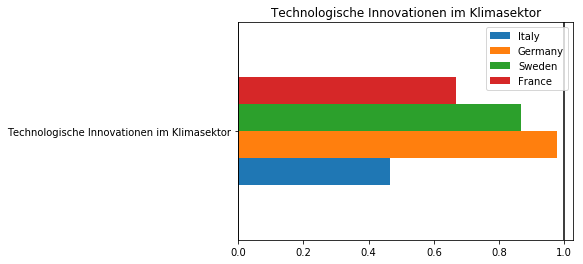

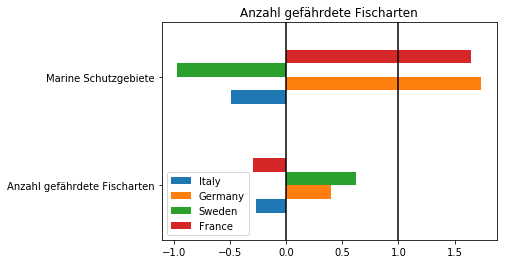

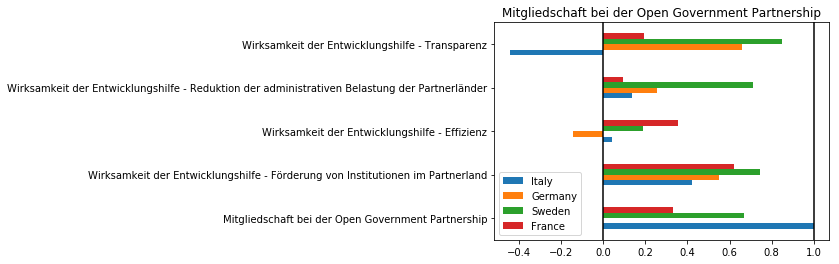

In [329]:
for i in range(1,18):
    try:
        plot_sdg(countries=['Germany', 'Italy', 'France', 'Sweden'], sdg=i)
    except:
        print("Problems at {}".format(i))